In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from preprocessing_helpers import organize_csv_files_by_dir, clean_files

# Cleaning (Preprocessing) the data

## 0. Save the references by experiment (if mixed on another folder)

In [6]:
source_directory = "../../performance_evaluation/references"    
destination_directory = "../../interviews_corrected/0_raw"    

organize_csv_files_by_dir(source_directory, destination_directory)

../../performance_evaluation/references\ID 05.csv
Copied ID 05.csv to ../../interviews_corrected/0_raw\OBE1
../../performance_evaluation/references\Id 08.csv
Copied Id 08.csv to ../../interviews_corrected/0_raw\OBE1
../../performance_evaluation/references\Id 13.csv
Copied Id 13.csv to ../../interviews_corrected/0_raw\OBE1
../../performance_evaluation/references\Id 13b.csv
Copied Id 13b.csv to ../../interviews_corrected/0_raw\OBE1
../../performance_evaluation/references\Id 14.csv
Copied Id 14.csv to ../../interviews_corrected/0_raw\OBE1
../../performance_evaluation/references\Id 15.csv
Copied Id 15.csv to ../../interviews_corrected/0_raw\OBE1
../../performance_evaluation/references\Id 16.csv
Copied Id 16.csv to ../../interviews_corrected/0_raw\OBE1
../../performance_evaluation/references\Id 17.csv
Copied Id 17.csv to ../../interviews_corrected/0_raw\OBE1
../../performance_evaluation/references\Id 18.csv
Copied Id 18.csv to ../../interviews_corrected/0_raw\OBE1
../../performance_evaluati

## 1. Remove fillers, repetitions

In [7]:
source_directory = "../../interviews_corrected/0_raw" 
destination_directory = "../../interviews_corrected/1_cleaned"    

# List of common filler words to remove
filler_words = ["uh", "huh", "um", "hmm", "Mm"]

clean_files(source_directory, destination_directory, filler_words)


## 2. Predict assignment of Speaker Role if not done manually
- Achieve 100 % accuracy, on this subset of interviews.

- Work pretty well, on *normal* audio interviews, might be incorrect on "0 : No interview (eg. Set-up)" see **structured_data_manual.xlsx** (even if in this subset it  was correctly predicted)

In [8]:
source_directory = "../../interviews_corrected/1_cleaned"    
destination_directory = "../../interviews_corrected/2_cleaned_role" 

clean_files(source_directory, destination_directory, roles=True)

File 'S209-2.csv': Couldn't accurately predict the most probable participant. Define the mosts probable interviewers and select by default the participant as a fallback.


In [10]:
"""import pandas as pd
from analysis_helpers import assign_roles

file = "../../interviews_corrected/1_cleaned/OBE2/S208-1.csv"
df = pd.read_csv(file)

roles, f = assign_roles(df)
f"""

'import pandas as pd\nfrom analysis_helpers import assign_roles\n\nfile = "../../interviews_corrected/1_cleaned/OBE2/S208-1.csv"\ndf = pd.read_csv(file)\n\nroles, f = assign_roles(df)\nf'

## 3. Manual check to verify the role assignment & cut unrelated parts of the interview (Setup, etc.)

## 4.Text Format :)

In [90]:
source_directory = "../../interviews_corrected/3_manual_check"    
destination_directory = "../../interviews_corrected/4_text" 

clean_files(source_directory, destination_directory, text_format=True)

# Analysis

In [3]:
from analysis_helpers import *

In [4]:
directory = '../../interviews_corrected/3_manual_check/**/' 

combined_df = load_and_combine_csv(directory)
combined_df = standardize_data(combined_df)
combined_df = calculate_word_char_counts(combined_df)

Found 82 CSV files.
Standardized speaker labels.
Normalized text in 'Content' column.
Calculated 'Word_Count' and 'Character_Count' for each response.


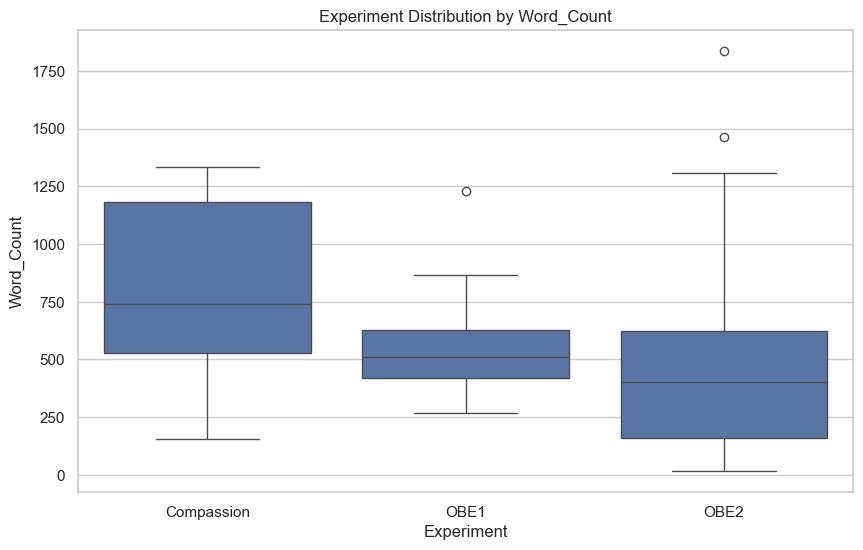

In [3]:
box_plot(aggregate_counts(combined_df, ['Experiment', 'File Name']), 'Experiment', 'Word_Count')

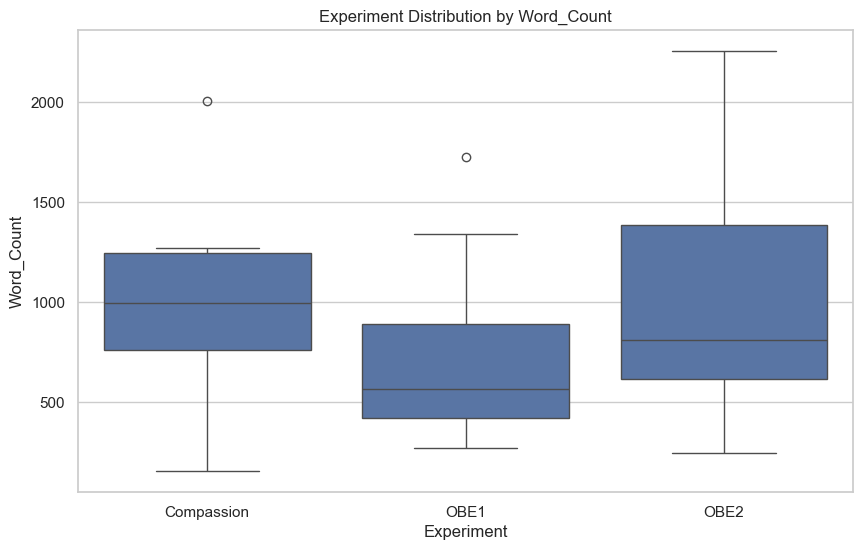

In [4]:
box_plot(aggregate_counts(combined_df,["Experiment","Id"]), 'Experiment', 'Word_Count')

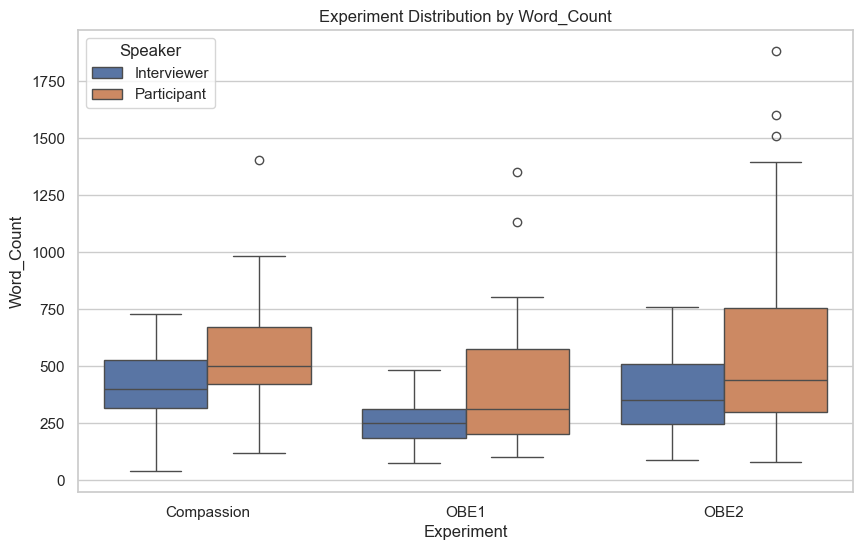

In [5]:
box_plot(aggregate_counts(combined_df, ['Experiment', "Id", 'Speaker']), 'Experiment', 'Word_Count', 'Speaker')

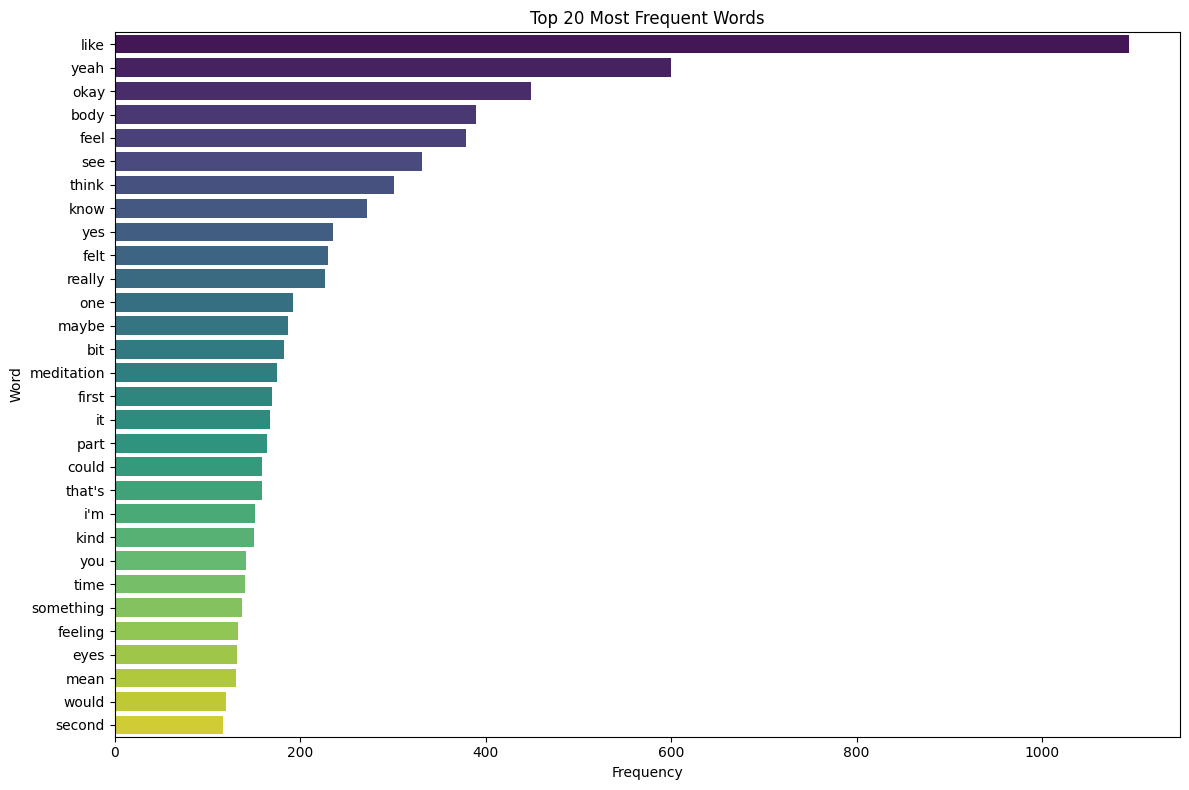

In [5]:
word_frequency_plot(combined_df,top_n=30)

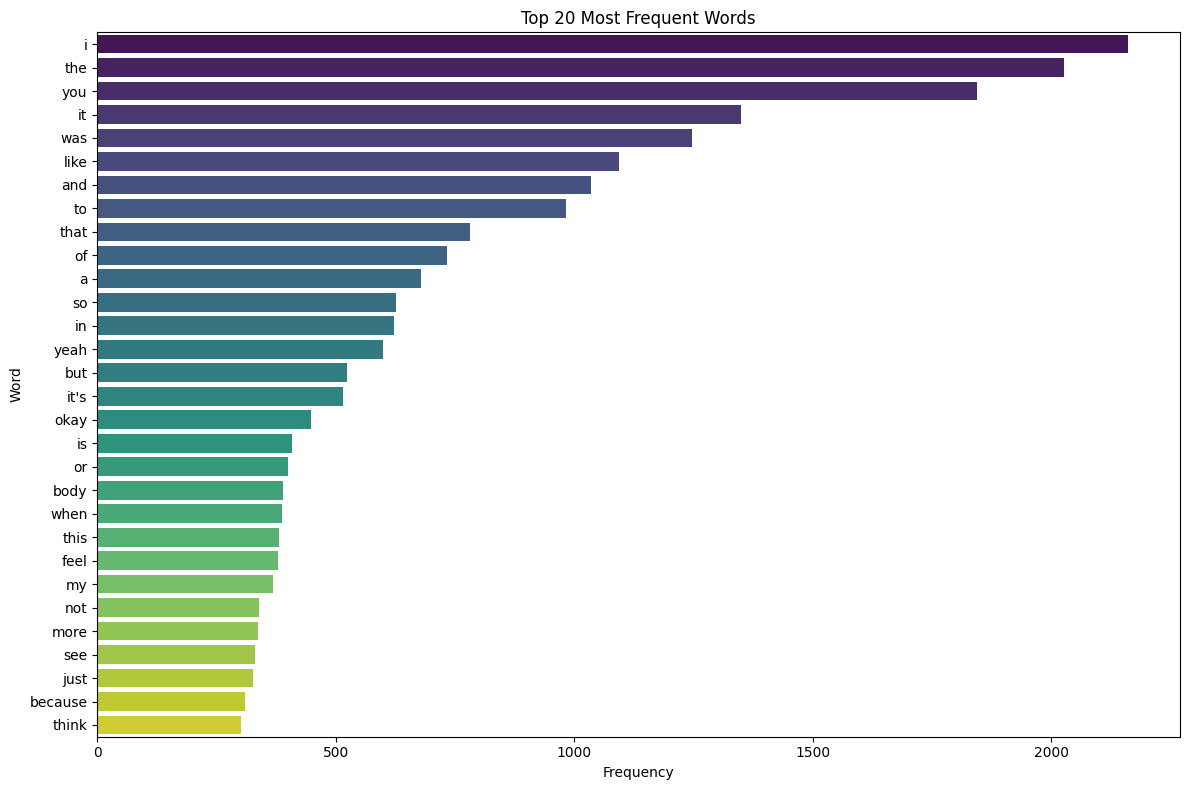

In [4]:
word_frequency_plot(combined_df,top_n=30)

# Interesting

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated image:
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Words')
plt.show()
